## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("housing.csv")

In [4]:
print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Data preprocessing

In [5]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [108]:
X = df[["Avg. Area House Age"]]
y = df["Price"]

## Train-Test split

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
X_train.shape

(4000, 1)

In [111]:
X_test.shape

(1000, 1)

In [112]:
y_train.shape

(4000,)

In [113]:
y_test.shape

(1000,)

## Train the model

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [115]:
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [159880.41760501]
Intercept:  274542.9301685126


## Make prediction

In [116]:
y_pred = model.predict(X_test)

In [117]:
# Compare actual and predicted values 
comparision = pd.DataFrame({'Actual':y_test.values, 'Predicted':y_pred})

In [118]:
comparision.head()

,Actual,Predicted
0,1339096.077,1.396558e+06
1,1251794.179,1.376640e+06
2,1340094.966,1.352945e+06
3,1431507.623,1.281855e+06
4,1042373.524,8.201934e+05


## Evaluate the model

In [119]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: ",mse)

Mean squared error:  96430411520.29926


In [120]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("R2 score: ",r2_score)


R2 score:  0.21621971586826116


## Visualize the results

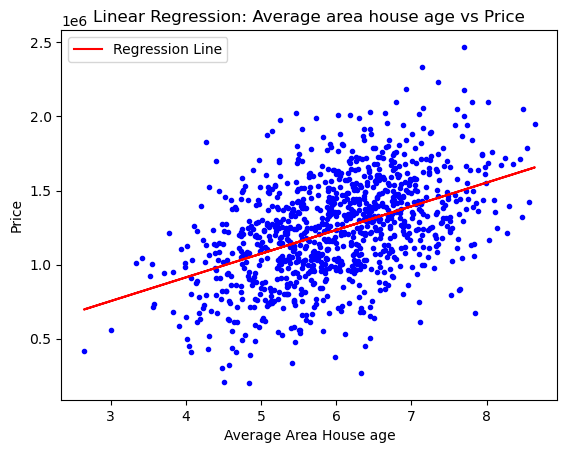

In [121]:
plt.scatter(X_test,y_test,color='blue', marker='.')
plt.plot(X_test,y_pred,color='red', label='Regression Line')
plt.xlabel("Average Area House age")
plt.ylabel("Price")
plt.title("Linear Regression: Average area house age vs Price")
plt.legend()
plt.show()

<Axes: ylabel='Price'>

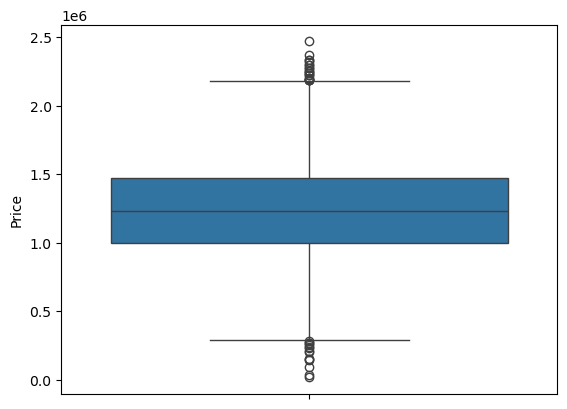

In [122]:
sns.boxplot(df['Price'])